# Micro Credit Defaulter Project
#### Introduction:
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services.

Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes. Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.

#### Problem Statement :
This project includes the real time problem for Micro Finance Institution (MFI) who offers financial services to lower income populations. MFI provides Micro Credit Loan on their mobile balance whihc needs to be paid back in 5 days.

The Consumer is believed to be defaulter if he do not pay back the loaned amount within the time duration i.e. 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

#### Label Description
label: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn: mobile number of user

aon: age on cellular network in days

daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30: Average main account balance over last 30 days

rental90: Average main account balance over last 90 days

last_rech_date_ma: Number of days till last recharge of main account

last_rech_date_da: Number of days till last recharge of data account

last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30: Number of times main account got recharged in last 30 days

fr_ma_rech30: Frequency of main account recharged in last 30 days

sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90: Number of times main account got recharged in last 90 days

fr_ma_rech90: Frequency of main account recharged in last 90 days

sumamnt_ma_rech90: Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30: Number of times data account got recharged in last 30 days

fr_da_rech30: Frequency of data account recharged in last 30 days

cnt_da_rech90: Number of times data account got recharged in last 90 days

fr_da_rech90: Frequency of data account recharged in last 90 days

cnt_loans30: Number of loans taken by user in last 30 days

amnt_loans30: Total amount of loans taken by user in last 30 days

maxamnt_loans30: maximum amount of loan taken by the user in last 30 days

medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days

cnt_loans90: Number of loans taken by user in last 90 days

amnt_loans90: Total amount of loans taken by user in last 90 days

maxamnt_loans90: maximum amount of loan taken by the user in last 90 days

medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days

payback30: Average payback time in days over last 30 days

payback90: Average payback time in days over last 90 days

pcircle: telecom circle

pdate: date

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#To see all columns
pd.set_option('display.max_columns',None)

In [3]:
#reading csv and storing it in df
#using double slash because of unicode error
df=pd.read_csv("C:\\Users\\JOHN TOJO\\Desktop\\Micro Credit Project\\Data file.csv")
df.head(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


#### splitting date into 3 columns day month and year respectively and dropping date column

In [4]:
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Year']=df['pdate'].apply(lambda x:x.year)
df.drop('pdate',axis=1,inplace=True)
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7,2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8,2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8,2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6,2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17,6,2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12,6,2016
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29,7,2016
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25,7,2016


#### checking datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

- data has object and numerical datatype


#### Checking for unique values in each columns

In [6]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [7]:
# checking for columns having only 1 unique 
pos=np.where(df.nunique()<2)
df.columns[pos]

Index(['pcircle', 'Year'], dtype='object')

In [8]:
# checking for columns having all unique  
pos=np.where(df.nunique()==209593)
df.columns[pos]

Index(['Unnamed: 0'], dtype='object')

#### dropping msisdn, pcircle, year and Unnamed: 0 

In [9]:
df.drop(columns=['msisdn', 'pcircle', 'Year','Unnamed: 0'],inplace=True,axis=1)
df.shape

(209593, 35)

#### checking for nulls

In [10]:
df.isnull().sum().sum()

0

no nulls present

#### check for duplicates

In [11]:
df.duplicated().sum()

31

has one duplicate dropping it 

In [12]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.shape

(209562, 35)

#### Dropping columns having more than 80% zero

In [13]:
columns=df.columns[df.eq(0).mean()>0.8]
columns

Index(['last_rech_date_da', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90',
       'fr_da_rech90', 'medianamnt_loans30', 'medianamnt_loans90'],
      dtype='object')

In [14]:
df.drop(columns,axis=1,inplace=True)
df.shape

(209562, 28)

#### seperating numerical and categorical data type

In [15]:
numericalCol=df.select_dtypes(include=np.number).columns
print("The numerical columns are:",numericalCol)
print('\n')
objectColumns=df.select_dtypes(include=np.object).columns
print("The categorical columns are:",objectColumns)

The numerical columns are: Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'Day',
       'Month'],
      dtype='object')


The categorical columns are: Index([], dtype='object')


In [16]:
discretecols=[]
continuecols=[]

for column in numericalCol:
     if df[column].nunique()>50:
        continuecols.append(column)
     
     else:
        discretecols.append(column)
        
print("The discrete columns are:",discretecols)
print('\n')
print("The continuous columns are:",continuecols)  

The discrete columns are: ['label', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans90', 'Day', 'Month']


The continuous columns are: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'payback30', 'payback90']


#### checking how the data is defined statistically for numerical datas and visualising

In [17]:
df[continuecols].describe().T

,count,mean,std,min,25%,50%,75%,max
aon,209562.0,8113.512796,75701.620014,-48.000000,246.00000,527.000000,982.0000,999860.755168
daily_decr30,209562.0,5382.170031,9221.086606,-93.012667,42.48000,1470.465667,7246.0000,265926.000000
daily_decr90,209562.0,6083.386523,10919.382966,-93.012667,42.71325,1500.000000,7804.0000,320630.000000
rental30,209562.0,2692.964058,4308.784971,-23737.140000,280.80000,1083.940000,3357.4525,198926.110000
rental90,209562.0,3483.905668,5770.737718,-24720.580000,300.37000,1334.400000,4202.5375,200148.110000
last_rech_date_ma,209562.0,3756.403389,53909.859829,-29.000000,1.00000,3.000000,7.0000,998650.377733
last_rech_amt_ma,209562.0,2064.754512,2370.831005,0.000000,770.00000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,209562.0,3.978622,4.256138,0.000000,1.00000,3.000000,5.0000,203.000000
fr_ma_rech30,209562.0,3737.907974,53647.573470,0.000000,0.00000,2.000000,6.0000,999606.368132
sumamnt_ma_rech30,209562.0,7705.599512,10139.952367,0.000000,1540.00000,4628.000000,10011.0000,810096.000000


- it can be seen that some features have negative values

In [18]:
# getting columns that have negative values
pos=(df[continuecols] >= 0).all()
pos1=np.where(pos==False)
df[continuecols].columns[pos1]

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'medianmarechprebal30', 'medianmarechprebal90'],
      dtype='object')

- aon cannot be negative as age on cellular network in days cannot be negative least value can be 0
- daily_decr30 and daily_decr90 can be negative as its definition implies Daily amount spent from main account, averaged over last 30 days this occurs when the person has negative balance
- rental30 and rental90 can be negative as its avg balance of account, negative value occurs when that person doesnt deposits money and keeps withdrawing from bank account
- last_rech_date_ma  cannot be negative 
- medianmarechprebal30 and medianmarechprebal90 can be negative


#### removing negative values from aon

In [19]:
col=['aon','last_rech_date_ma']

In [20]:
df1=df.copy()

In [21]:
from nltk import flatten
index=[]
for cols in df[col].columns.values:
    data1=df[df[f'{cols}'] < 0].index.values
    data2=data1.tolist()
    index.append(data2)
dataindex=flatten(index)

In [22]:
df1.drop(dataindex,inplace=True)
df1.shape

(206711, 28)

In [23]:
data_loss=((df.shape[0]-df1.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  1.360456571324954  %


#### dealing with extreme values

aon

the max value is unrealistic as max value represents 2739.3 years which is not lifespan of humans

In [24]:
df1.drop(index=206182,axis=0,inplace=True)
df1.shape

(206710, 28)

In [25]:
df1.reset_index(inplace=True)
df1.drop('index',axis=1,inplace=True)
df1.shape

(206710, 28)

In [26]:
# 22000 assuming that person could open at age of 20 and dies by age of 80 years so the max time the person could hold the account is 60 years that is aprox 22000 days
pos=np.where(df1['aon']>=22000)
df1.loc[pos]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Day,Month
64,1,929670.835962,4130.729333,4151.880000,6139.79,6529.55,22.0,3178,1,0.0,3178.0,3178.0,541.00,2,18,6356,3178.0,271.00,1,6,6.0,1.0,6,6,0.0,0.0,29,7
155,1,860950.168106,19.396000,19.396000,78.12,78.12,3.0,770,3,2.0,1716.0,770.0,24.10,6,2,2235,173.0,38.10,2,12,6.0,2.0,12,6,3.0,3.0,6,6
305,1,697664.842824,4.388000,4.388000,1002.96,1002.96,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,1,6,6.0,1.0,6,6,0.0,0.0,12,6
483,1,640022.888780,3302.210667,3315.440000,84.00,90.00,14.0,11874,1,0.0,11874.0,11874.0,440.33,1,0,11874,11874.0,440.33,2,12,6.0,2.0,12,6,0.0,0.0,2,7
575,1,872767.047840,242.000000,242.000000,0.00,0.00,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,1,12,12.0,1.0,12,12,0.0,0.0,17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206145,1,504021.842848,3.026667,3.026667,567.36,567.36,1.0,5787,1,0.0,5787.0,5787.0,84.24,1,0,5787,5787.0,84.24,2,12,6.0,2.0,12,6,1.0,1.0,4,6
206277,1,959124.978632,13103.000000,17517.650000,12734.61,17410.82,16.0,4048,1,0.0,4048.0,4048.0,71.83,8,2,36713,4048.0,28.08,0,0,0.0,2.0,12,6,0.0,4.0,9,8
206446,1,803380.621830,18.821333,18.821333,98.24,98.24,5.0,1539,2,5.0,2312.0,1156.0,12.00,2,5,2312,1156.0,12.00,3,18,6.0,3.0,18,6,2.0,2.0,8,6
206557,0,581435.484230,2.666667,2.666667,10.00,10.00,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,1,6,6.0,1.0,6,6,0.0,0.0,5,6


In [27]:
df1.drop(index=pos[0],inplace=True)
df1.reset_index(inplace=True)
df1.drop('index',axis=1,inplace=True)
df1.shape

(204630, 28)

In [28]:
pos=np.where(df1['last_rech_date_ma']>=22000)
df1.loc[pos]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Day,Month
52,1,635.0,5.500000,5.500000,75.90,75.90,559958.753409,173,0,0.0,0.0,0.0,0.00,1,0,173,173.0,94.47,1,6,6.0,1.0,6,6,0.000000,0.00,5,6
155,1,415.0,9507.542667,9622.480000,418.58,-239.39,835708.591971,1924,5,2.0,8081.0,1924.0,76.00,6,17,9620,1731.5,52.00,4,30,12.0,4.0,30,12,4.666667,9.75,19,7
228,1,211.0,0.640000,0.640000,227.60,227.60,942339.085159,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,1,6,6.0,1.0,6,6,0.000000,0.00,5,6
470,1,675.0,36.495000,36.495000,354.75,354.75,851900.279638,1539,4,3.0,4803.0,1243.0,162.07,5,32,6350,1539.0,114.07,1,6,6.0,1.0,6,6,0.000000,0.00,15,6
628,0,538.0,2555.472000,2554.020000,2661.16,9705.56,942783.444771,770,1,0.0,770.0,770.0,-114.00,1,0,770,770.0,-114.00,1,6,6.0,1.0,6,6,0.000000,0.00,22,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204104,1,1096.0,76.076000,76.076000,238.55,238.55,906797.496602,8000,2,37.0,15400.0,7700.0,2.44,2,37,15400,7700.0,2.44,1,6,6.0,1.0,6,6,0.000000,0.00,13,6
204415,1,1319.0,56.602333,56.602333,921.69,921.69,717893.571826,4048,2,23.0,8096.0,4048.0,184.85,3,47,16096,4048.0,356.85,1,6,6.0,1.0,6,6,0.000000,0.00,11,6
204505,1,190.0,2601.750000,2622.100000,-334.62,-441.57,767980.563105,1539,4,12.0,6156.0,1539.0,145.50,5,47,7703,1539.0,26.00,3,24,12.0,3.0,24,12,6.000000,6.00,5,7
204540,1,460.0,55.520000,55.520000,877.40,877.40,611678.500427,1539,1,0.0,1539.0,1539.0,0.50,2,42,2486,1243.0,30.50,2,12,6.0,2.0,12,6,13.000000,13.00,10,6


In [29]:
df1.drop(index=pos[0],inplace=True)
df1.reset_index(inplace=True)
df1.drop('index',axis=1,inplace=True)
df1.shape

(203600, 28)

In [30]:
pos=np.where(df1['last_rech_amt_ma']>=22000)
df1.loc[pos]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Day,Month
4897,1,120.0,30865.000000,39760.100000,8103.13,9771.34,1.0,32000,10,2.000000,56089.0,4048.0,77.50,20,0,84165,4048.0,96.00,6,36,6.0,6.0,36,6,1.500000,1.500000,10,8
6666,1,1483.0,13157.200000,13159.500000,49278.42,50603.58,1.0,55000,3,2.000000,61557.0,5787.0,13.00,4,0,67344,5787.0,13.00,1,6,6.0,1.0,6,6,0.000000,0.000000,6,7
10285,1,292.0,368.316333,368.316333,-1958.74,-1958.74,1.0,55000,1,0.000000,55000.0,55000.0,57.00,1,0,55000,55000.0,57.00,1,6,6.0,1.0,6,6,0.000000,0.000000,17,6
13154,1,152.0,2430.539000,2455.130000,27552.97,27728.32,5.0,32000,2,0.000000,32770.0,16385.0,194.00,4,8,35848,1539.0,14.50,1,12,12.0,1.0,12,12,0.000000,0.000000,21,7
15653,1,412.0,31398.000000,31398.000000,8869.56,8869.56,26.0,32000,1,0.000000,32000.0,32000.0,489.00,2,37,33720,16860.0,254.50,1,6,6.0,1.0,6,6,0.000000,0.000000,30,7
15939,1,1343.0,108803.552000,109840.480000,3748.99,-4060.21,1.0,32000,4,2.000000,50965.0,7458.5,20.60,4,2,50965,7458.5,20.60,1,6,6.0,2.0,12,6,15.000000,15.000000,8,7
16676,1,821.0,1283.151333,1431.620000,878.23,1150.84,15.0,32000,2,14.000000,33924.0,16962.0,57.90,3,6,34697,1924.0,24.90,1,6,6.0,1.0,6,6,0.000000,0.000000,13,7
16748,1,219.0,1245.332667,1258.620000,-453.85,-469.50,25.0,32000,2,27.000000,64000.0,32000.0,3040.50,2,27,64000,32000.0,3040.50,1,6,6.0,1.0,6,6,0.000000,0.000000,1,7
16987,1,469.0,1717.016000,1717.016000,-1909.44,-1909.44,3.0,32000,6,1.000000,170000.0,32000.0,313.70,6,1,170000,32000.0,313.70,4,24,6.0,4.0,24,6,1.333333,1.333333,24,6
20869,0,2256.0,612.438333,612.350000,15840.09,16386.30,13.0,55000,1,0.000000,55000.0,55000.0,278.80,1,0,55000,55000.0,278.80,1,6,6.0,1.0,6,6,0.000000,0.000000,1,7


In [31]:
df1.drop(index=pos[0],inplace=True)
df1.reset_index(inplace=True)
df1.drop('index',axis=1,inplace=True)
df1.shape

(203540, 28)

In [32]:
data_loss=((df.shape[0]-df1.shape[0])/df.shape[0])*100
print("total data loss ", data_loss, " %")

total data loss  2.8736125824338385  %


In [33]:
df2=df1[continuecols].describe().T
df2['mean to std ratio']=df2['mean']/df2['std']
df2

,count,mean,std,min,25%,50%,75%,max,mean to std ratio
aon,203540.0,660.156957,497.648619,1.000000,248.000000,525.000000,967.000000,2440.000000,1.326552
daily_decr30,203540.0,5450.471537,9229.331566,-93.012667,45.033833,1545.066667,7364.122083,265926.000000,0.590560
daily_decr90,203540.0,6161.764172,10943.262625,-93.012667,45.281667,1580.385000,7954.177500,320630.000000,0.563065
rental30,203540.0,2715.182630,4315.777864,-23737.140000,291.000000,1100.215000,3395.007500,198926.110000,0.629129
rental90,203540.0,3516.111013,5785.919284,-24720.580000,313.200000,1363.420000,4250.915000,200148.110000,0.607701
last_rech_date_ma,203540.0,6.174442,9.382928,0.000000,1.000000,3.000000,7.000000,113.000000,0.658051
last_rech_amt_ma,203540.0,2057.842537,2261.325978,0.000000,770.000000,1539.000000,2309.000000,21739.000000,0.910016
cnt_ma_rech30,203540.0,4.011610,4.244190,0.000000,1.000000,3.000000,5.000000,99.000000,0.945200
fr_ma_rech30,203540.0,3752.818424,53746.921149,0.000000,0.000000,2.000000,6.000000,999606.368132,0.069824
sumamnt_ma_rech30,203540.0,7760.230702,10122.354152,0.000000,1543.000000,4635.000000,10027.000000,810096.000000,0.766643


- the data is highly spread
- unrealistic data has been controlled to some extend 

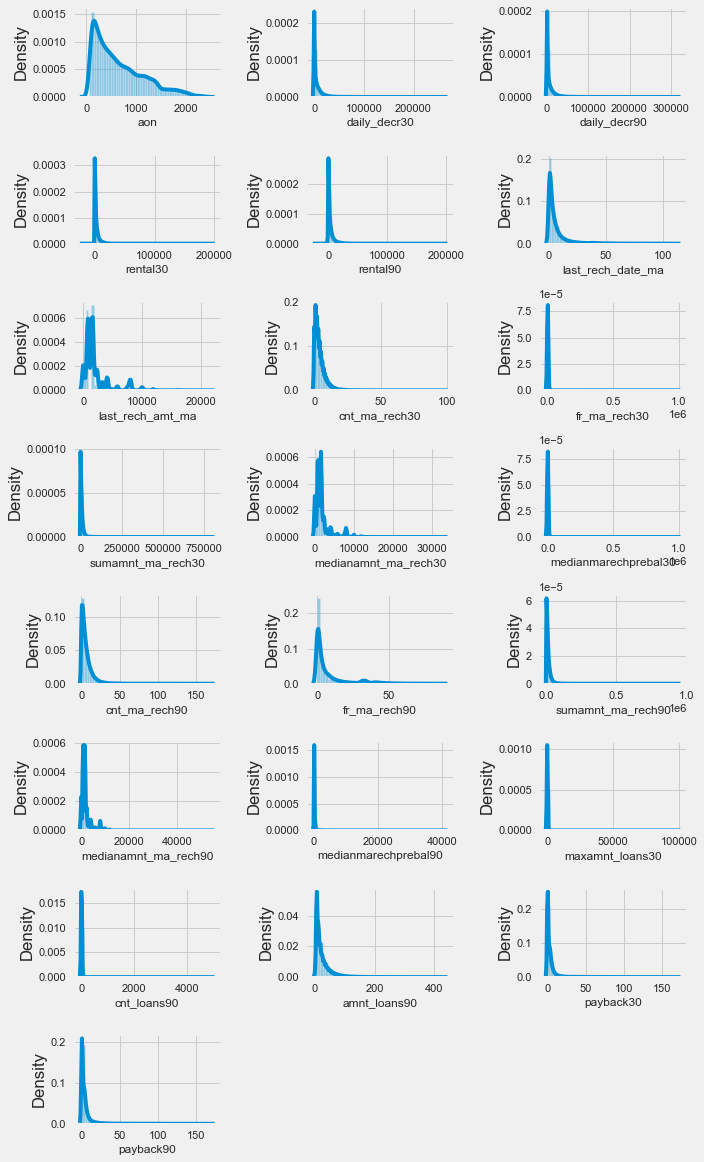

In [36]:
# plotting distribution graph 
j=0
plt.figure(figsize=(10,20))
for column in df1[continuecols]:
    plt.subplot(10,3,j+1)
    sns.distplot(df1[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- the datas are highly skewed 
- presence of outliers

#### checking how the data is defined statistically for numerical discrete datas and visualising

In [37]:
df2=df1[discretecols].describe().T
df2['mean to std ratio']=df2['mean']/df2['std']
df2

,count,mean,std,min,25%,50%,75%,max,mean to std ratio
label,203540.0,0.876142,0.329420,0.0,1.0,1.0,1.0,1.0,2.659651
cnt_loans30,203540.0,2.782087,2.562984,0.0,1.0,2.0,4.0,50.0,1.085487
amnt_loans30,203540.0,18.110809,17.432490,0.0,6.0,12.0,24.0,306.0,1.038911
maxamnt_loans90,203540.0,6.713462,2.116589,0.0,6.0,6.0,6.0,12.0,3.171830
Day,203540.0,14.453940,8.437516,1.0,7.0,14.0,21.0,31.0,1.713056
Month,203540.0,6.806888,0.741233,6.0,6.0,7.0,7.0,8.0,9.183202


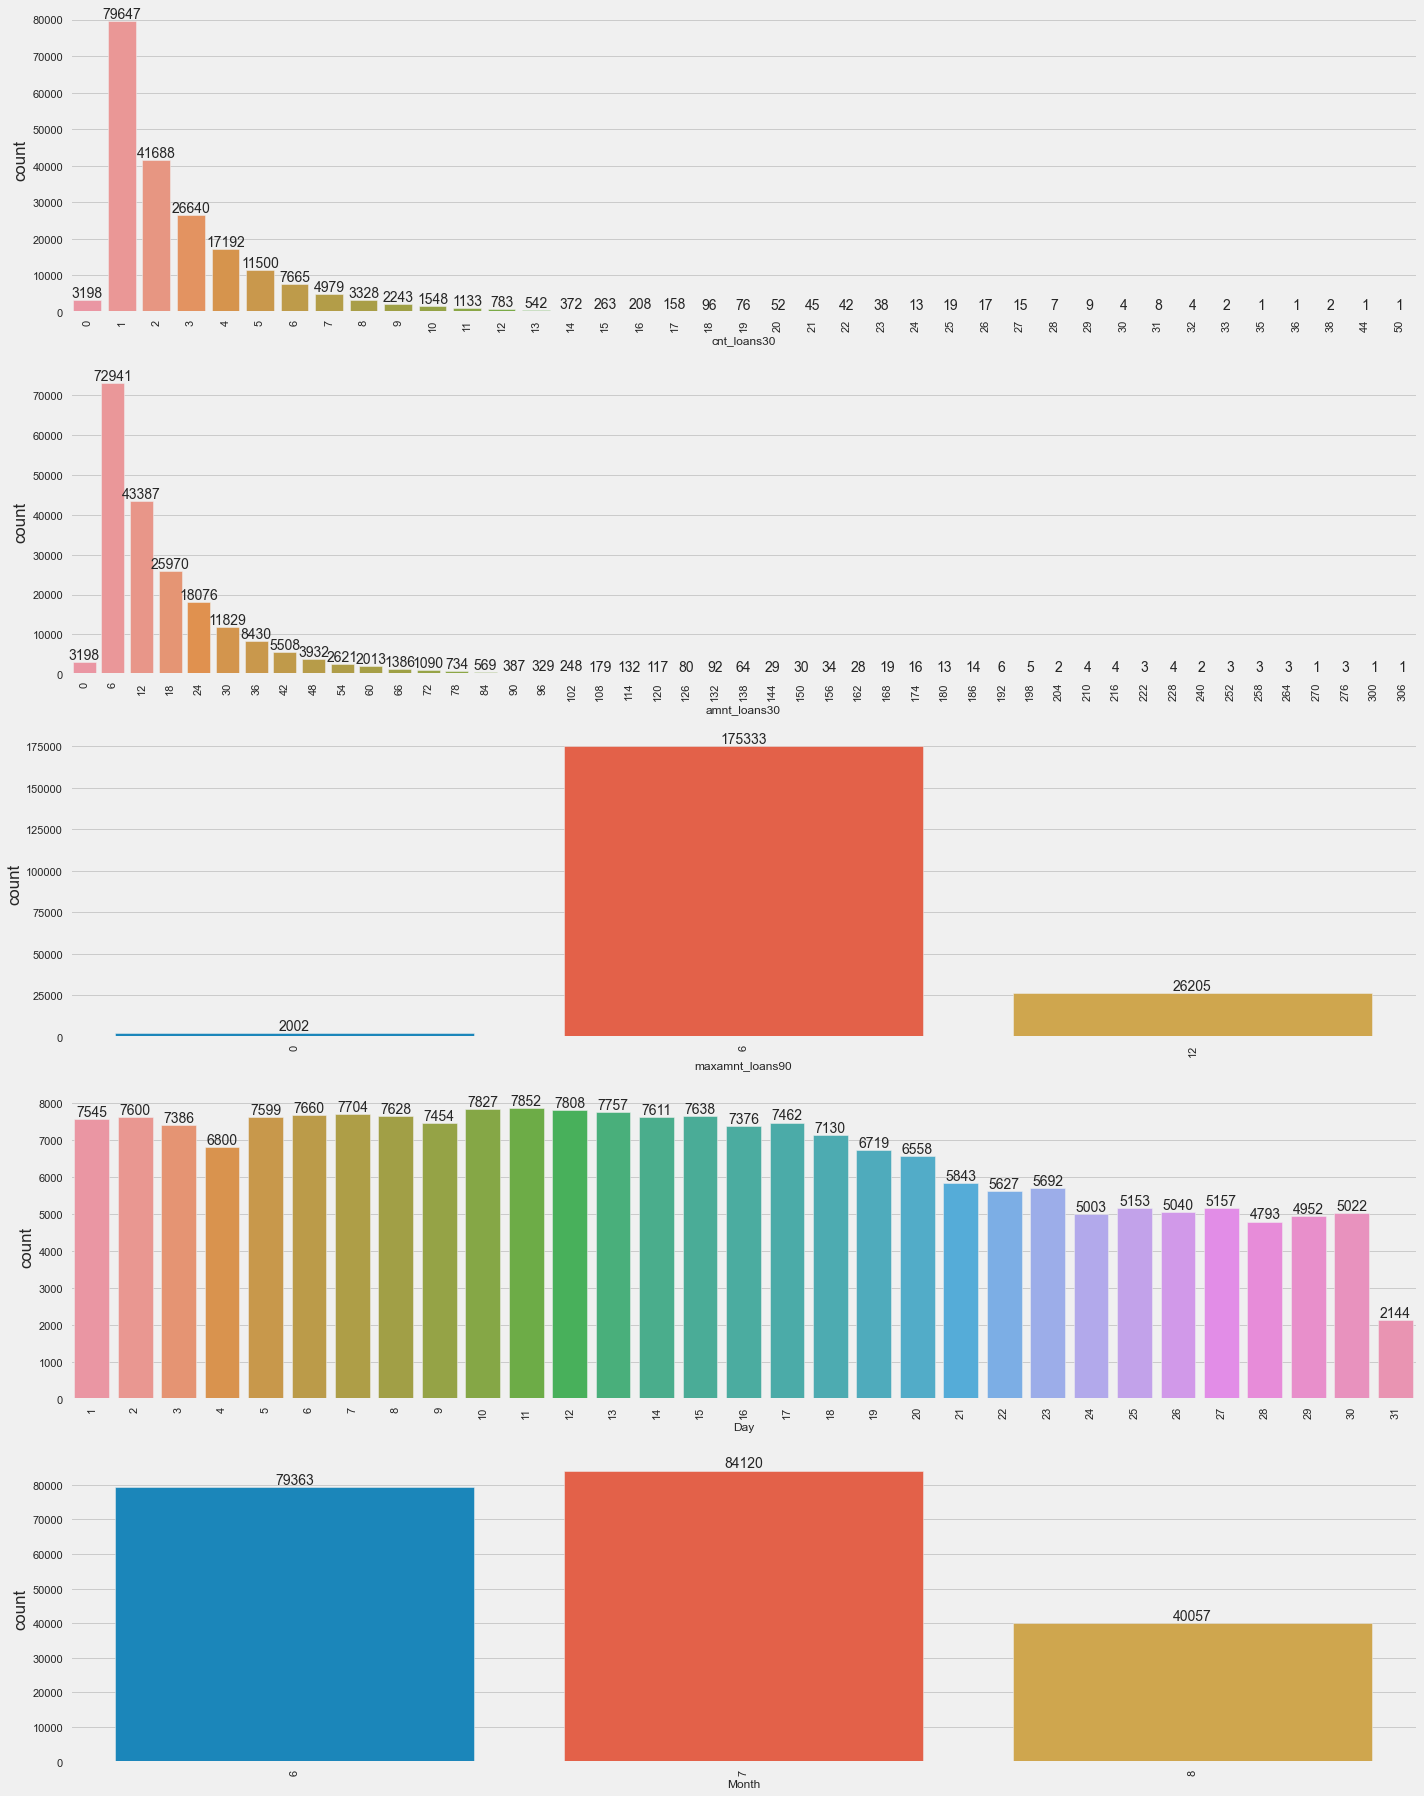

In [38]:
# plotting countplot graph 

j=0
plt.figure(figsize=(20,50))
for column in df1[discretecols[1:]]:
    plt.subplot(10,1,j+1)
    ax =sns.countplot(df1[column])
    ax.bar_label(ax.containers[0]);
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- cnt_loans30
	- most of the customers have taken 1 loan in past 30 days
	- there are some cases where no of loans taken are more than 20


- amnt_loans30
	- total amount of loan taken by the customer in the past 30 days is mostly 6 followed by 12


- maxamnt_loans90
	- the max amount of loans taken by cusomter in 90 days is 6


- Day
	- days 6, 7, 10, 11, 12 has the largest amount of data


- Month
	- 7th month has most no of data

#### Bivariate analysis

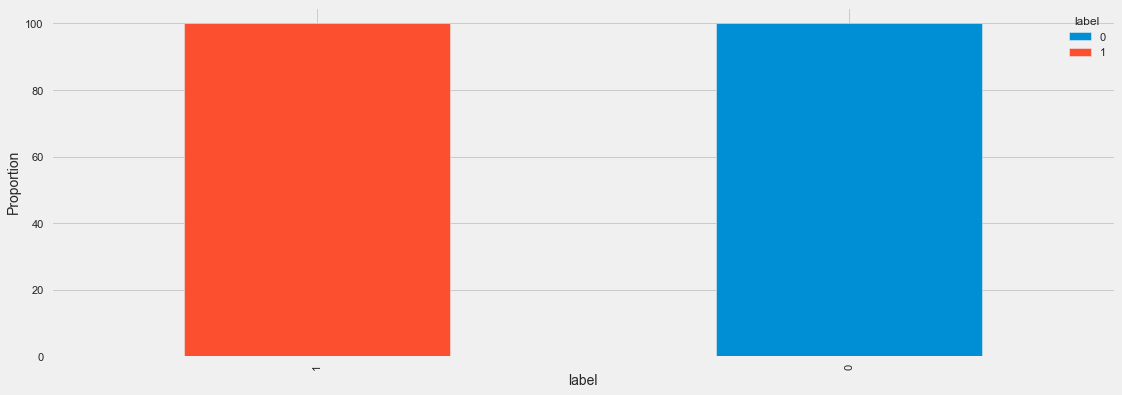

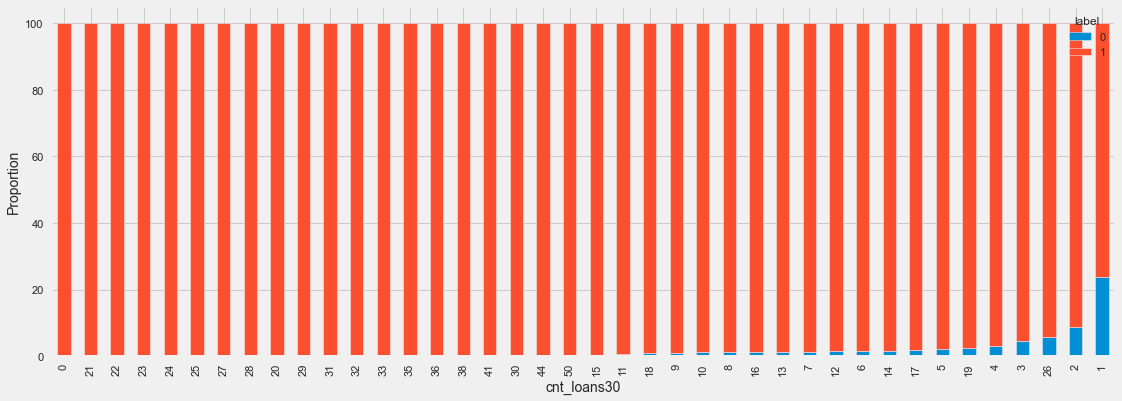

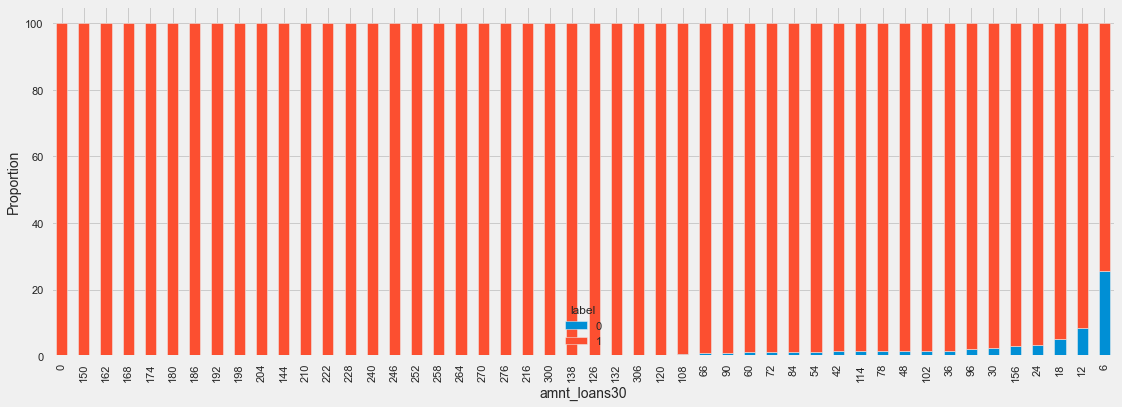

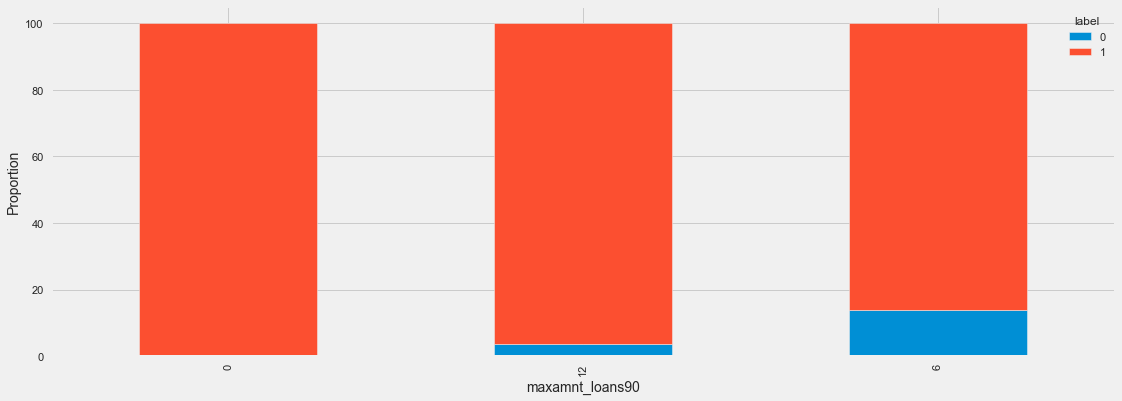

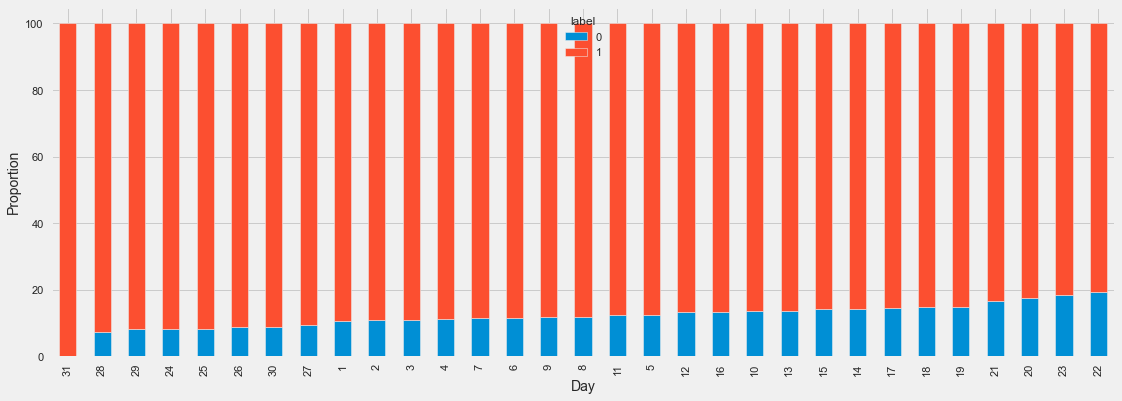

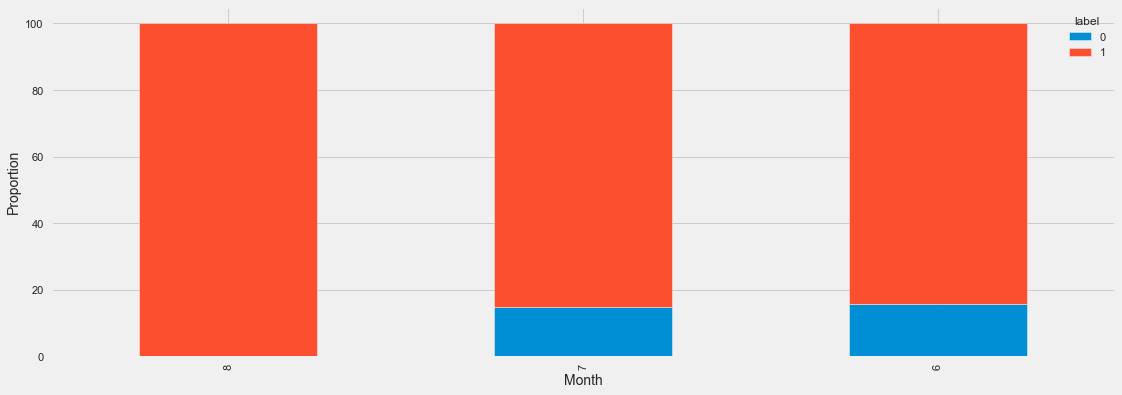

In [39]:
# plotting distribution graph 
for column in df[discretecols]:
    table_country = pd.crosstab(df[column], df['label'])
    (table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',stacked = True,figsize = (17,6));
    plt.xlabel(column,fontsize = 14);
    plt.ylabel('Proportion',fontsize = 14);


In [40]:
balance=[(df1['rental90'] <=0),df1['rental90'].between(0,300),df1['rental90'].between(300,3516),(df1['rental90'] > 3516)]
values_1= ['Negative or zero Balance', 'Low Balance', 'Average Balance','High Balance']
df1['Balance_Category']=np.select(balance,values_1)
df1['Balance_Category'].value_counts()

Average Balance             93992
High Balance                59650
Low Balance                 37450
Negative or zero Balance    12448
Name: Balance_Category, dtype: int64

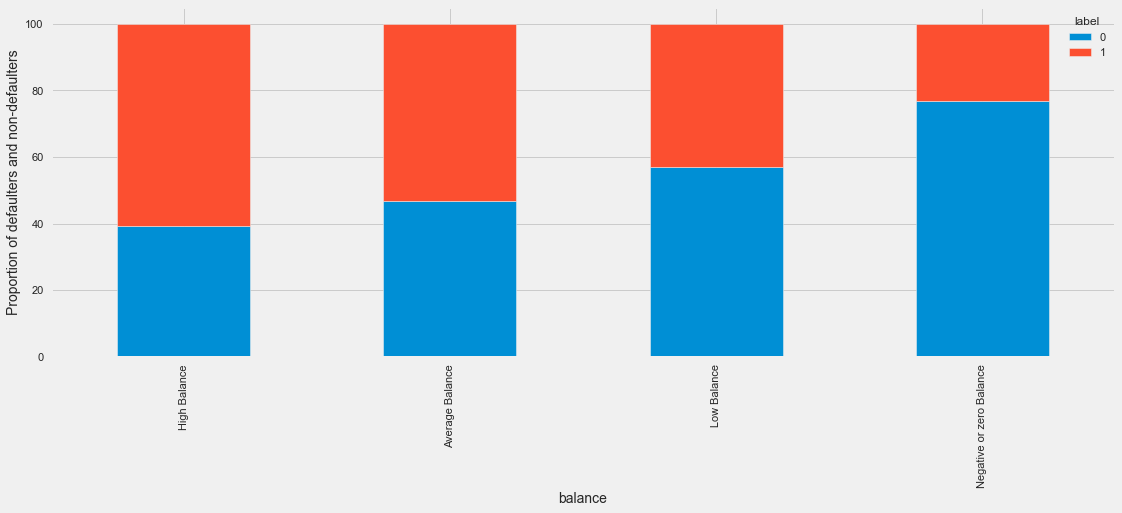

In [41]:
balance_category_percent = pd.crosstab(df1['Balance_Category'],df1['label']).apply(lambda x: x/x.sum()*100)
(balance_category_percent.div(balance_category_percent.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('balance',fontsize = 14);
plt.ylabel('Proportion of defaulters and non-defaulters',fontsize = 14);


- negative or zero balance have high chance to default

In [42]:
loan_fr=[(df1['cnt_loans90'] <=0),df1['cnt_loans90'].between(0,5),(df1['cnt_loans90'] > 5)]
values_2= ['No Loans', 'Average number of loans','High frequency of loans']
df1['Loans_Frequency']=np.select(loan_fr,values_2)
df1['Loans_Frequency'].value_counts()

Average number of loans    158834
High frequency of loans     42711
No Loans                     1995
Name: Loans_Frequency, dtype: int64

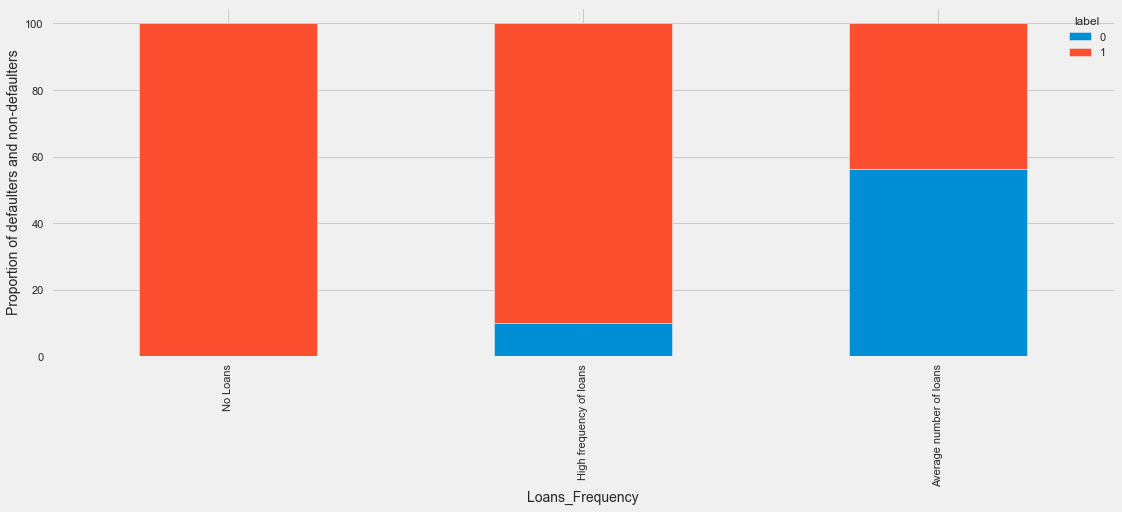

In [43]:
loan_category_percent = pd.crosstab(df1['Loans_Frequency'],df1['label']).apply(lambda x: x/x.sum()*100)
(loan_category_percent.div(loan_category_percent.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Loans_Frequency',fontsize = 14);
plt.ylabel('Proportion of defaulters and non-defaulters',fontsize = 14);

- customers who take loans in the range 0-5 have high chance to default

In [44]:
re_fr=[(df1['sumamnt_ma_rech90'] <=0),df1['sumamnt_ma_rech90'].between(0,2320),df1['sumamnt_ma_rech90'].between(2320,12504),(df1['sumamnt_ma_rech90'] > 12504)]
values_2= ['No recharge', 'low amount recharge','average amount recharge','high amount recharge']
df1['Recharge_Frequency']=np.select(re_fr,values_2)
df1['Recharge_Frequency'].value_counts()

average amount recharge    85162
high amount recharge       66645
low amount recharge        31300
No recharge                20433
Name: Recharge_Frequency, dtype: int64

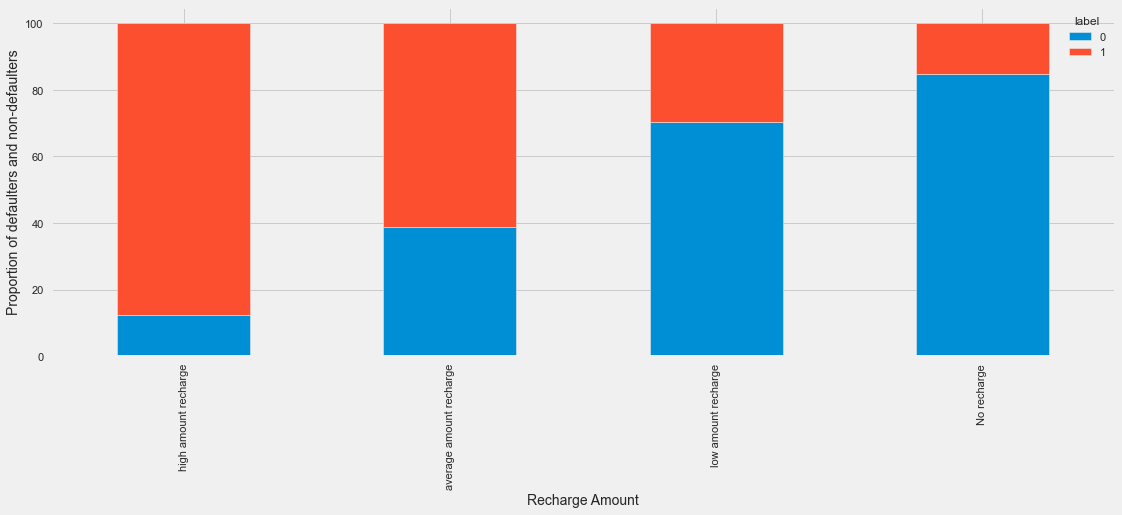

In [45]:
recharge_category_percent = pd.crosstab(df1['Recharge_Frequency'],df1['label']).apply(lambda x: x/x.sum()*100)
(recharge_category_percent.div(recharge_category_percent.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Recharge Amount',fontsize = 14);
plt.ylabel('Proportion of defaulters and non-defaulters',fontsize = 14);

- customers those who dont recharge their accounts have a chance to default

In [46]:
pb_fr=[(df1['payback90'] <=0),df1['payback90'].between(0,4),(df1['payback90'] > 4)]
values_2= ['No payback', 'average payback time','long payback time']
df1['Payback_Frequency']=np.select(pb_fr,values_2)
df1['Payback_Frequency'].value_counts()

No payback              91599
long payback time       56534
average payback time    55407
Name: Payback_Frequency, dtype: int64

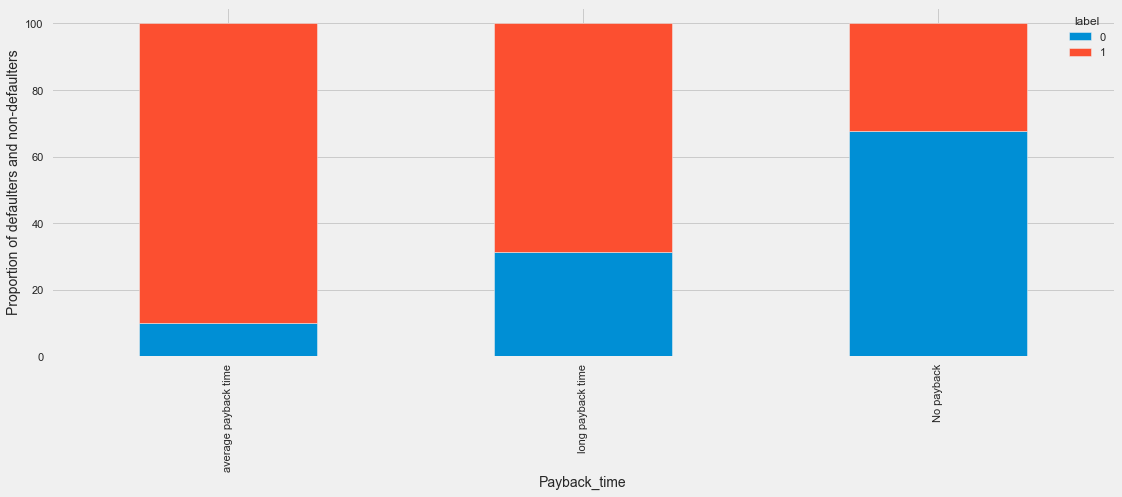

In [47]:
recharge_category_percent = pd.crosstab(df1['Payback_Frequency'],df1['label']).apply(lambda x: x/x.sum()*100)
(recharge_category_percent.div(recharge_category_percent.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Payback_time',fontsize = 14);
plt.ylabel('Proportion of defaulters and non-defaulters',fontsize = 14);

- defaulters are high for those who have not paid back

In [48]:
pb_fr=[(df1['aon'] <=10),df1['aon'].between(10,660),(df1['aon'] > 660)]
values_2= ['New customers', 'retention customers','Loyal customer']
df1['Customer']=np.select(pb_fr,values_2)
df1['Customer'].value_counts()

retention customers    120125
Loyal customer          83307
New customers             108
Name: Customer, dtype: int64

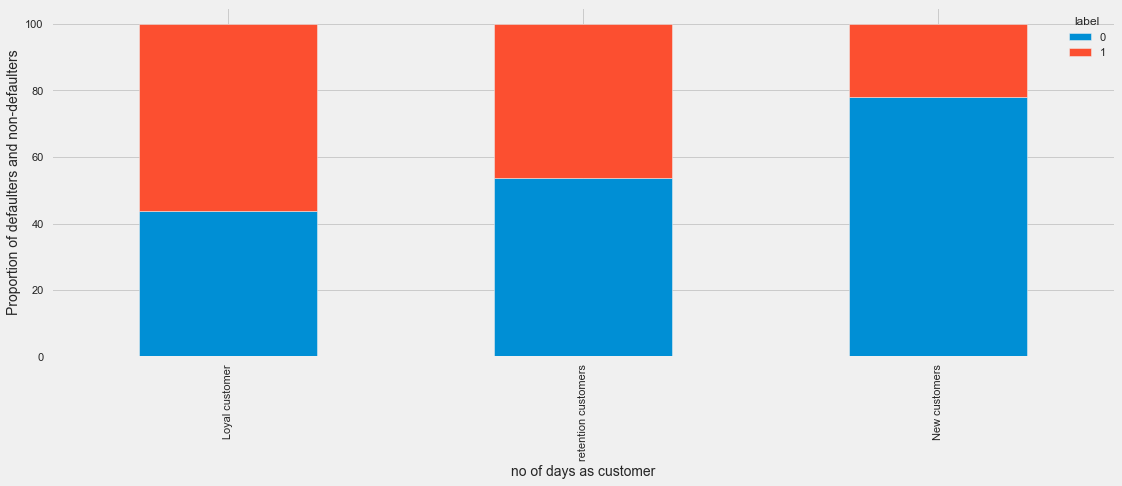

In [49]:
customer_category_percent = pd.crosstab(df1['Customer'],df1['label']).apply(lambda x: x/x.sum()*100)
(customer_category_percent.div(customer_category_percent.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('no of days as customer',fontsize = 14);
plt.ylabel('Proportion of defaulters and non-defaulters',fontsize = 14);

- defaulters are highest among new customers

In [50]:
df1.drop(columns=['Balance_Category','Loans_Frequency','Recharge_Frequency','Payback_Frequency','Customer'],inplace=True,axis=1)
df1.shape

(203540, 28)

#### check skewness

In [55]:
numericalCols=[ 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma', 'last_rech_amt_ma',
               'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30','medianmarechprebal30',
               'cnt_ma_rech90', 'fr_ma_rech90','sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
               'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30',
               'payback90', 'Day', 'Month']

In [56]:
df1.skew()[numericalCols].sort_values()

Day                      0.190789
Month                    0.325086
aon                      0.951970
maxamnt_loans90          1.659202
last_rech_amt_ma         2.288025
fr_ma_rech90             2.293664
medianamnt_ma_rech30     2.659687
cnt_loans30              2.682754
cnt_ma_rech30            2.748662
medianamnt_ma_rech90     2.779892
amnt_loans30             2.938661
cnt_ma_rech90            2.981244
amnt_loans90             3.129181
last_rech_date_ma        3.559215
daily_decr30             3.860366
daily_decr90             4.202087
rental90                 4.426930
rental30                 4.511740
sumamnt_ma_rech90        4.871027
sumamnt_ma_rech30        6.366593
payback90                6.866271
payback30                8.279961
fr_ma_rech30            14.737485
medianmarechprebal30    14.824439
cnt_loans90             16.593873
maxamnt_loans30         17.664963
medianmarechprebal90    45.377385
dtype: float64

the data is highly skewed

In [57]:
skew_col=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma', 'last_rech_amt_ma',
          'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 
          'cnt_ma_rech90', 'fr_ma_rech90','sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
         'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 
          'payback90']

In [58]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [59]:
df1[skew_col] = scaler.fit_transform(df1[skew_col].values)

In [60]:
df1[skew_col].isna().sum().sum()

0

In [61]:
# check 
df1.skew()[skew_col].sort_values()

daily_decr90           -6.693820
daily_decr30           -6.210482
maxamnt_loans30        -1.666359
rental30               -1.104986
rental90               -1.038156
sumamnt_ma_rech30      -0.297572
medianamnt_ma_rech30   -0.202515
sumamnt_ma_rech90      -0.196804
medianmarechprebal30   -0.105030
last_rech_amt_ma       -0.084056
medianamnt_ma_rech90   -0.060477
aon                    -0.053612
amnt_loans90           -0.007914
cnt_ma_rech90          -0.003826
cnt_ma_rech30          -0.001330
amnt_loans30            0.003576
cnt_loans30             0.035247
last_rech_date_ma       0.039559
cnt_loans90             0.099158
fr_ma_rech90            0.139069
fr_ma_rech30            0.157354
payback90               0.200551
payback30               0.286388
maxamnt_loans90         0.360084
medianmarechprebal90    7.628807
dtype: float64

In [62]:
skew_col=['daily_decr30', 'daily_decr90', 'rental30', 'rental90',
        'medianmarechprebal90', 'maxamnt_loans30']

In [63]:
# check 
df1.skew()[skew_col].sort_values()

daily_decr90           -6.693820
daily_decr30           -6.210482
maxamnt_loans30        -1.666359
rental30               -1.104986
rental90               -1.038156
medianmarechprebal90    7.628807
dtype: float64

In [64]:
for i in skew_col:
    df1[i]=np.cbrt(df1[i])

                  

In [65]:
# check 
df1.skew()[skew_col].sort_values()

daily_decr30            0.008577
daily_decr90            0.026785
medianmarechprebal90    0.791464
rental30                0.799061
rental90                0.805328
maxamnt_loans30         1.653316
dtype: float64

In [66]:
df1[skew_col].isna().sum().sum()

0

In [67]:
skew_col=['medianmarechprebal90', 'rental30', 'rental90', 'maxamnt_loans30']

In [68]:
df1[skew_col] = scaler.fit_transform(df1[skew_col].values)

In [69]:
# check 
df1.skew()[skew_col].sort_values()

maxamnt_loans30        -1.098542
medianmarechprebal90   -0.064772
rental90                0.304542
rental30                0.311677
dtype: float64

In [70]:
df1[skew_col].isna().sum().sum()

0

#### dropping maxamnt_loans30 as skewness cannot be reduced further

In [71]:
df1.drop('maxamnt_loans30',axis=1,inplace=True)
df1.shape

(203540, 27)

#### Outliers check

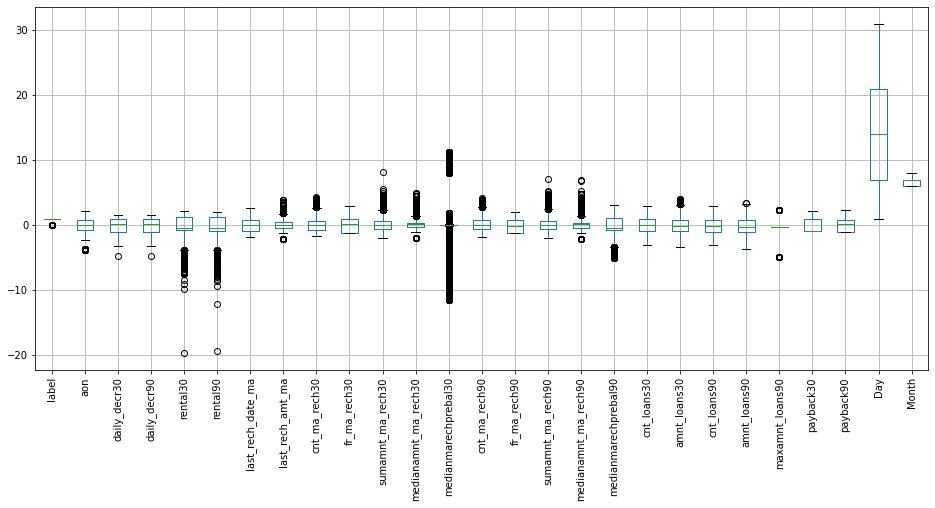

In [72]:
# visualizing
numericalCol=df1.select_dtypes(include=np.number).columns
df1[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

outliers are present

#### using zscore

In [73]:
from scipy.stats import zscore
z=np.abs(zscore(df1[numericalCol]))
df_x=df1[(z<3).all(axis=1)]
data_loss=((df1.shape[0]-df_x.shape[0])/df1.shape[0])*100
print("data loss ", data_loss, " %")

data loss  4.068487766532377  %


In [74]:
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("total data loss ", data_loss, " %")

total data loss  6.825187772592359  %


within limits

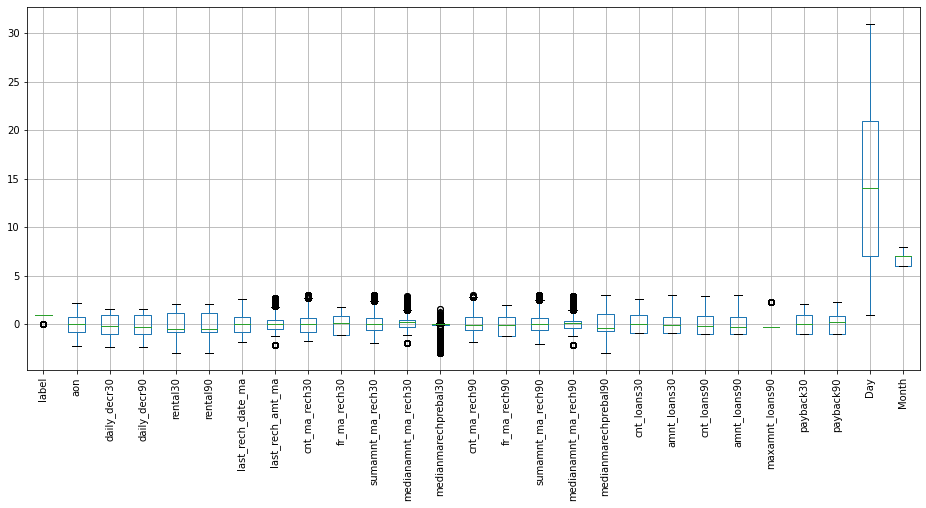

In [75]:
# visualizing
df_x[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

outliers have been reduced to a large extend

#### checking correlation

In [76]:
df_x.corr()["label"].sort_values()

Day                     0.011087
last_rech_date_ma       0.059659
rental30                0.079481
rental90                0.094966
aon                     0.095653
maxamnt_loans90         0.101143
Month                   0.151261
medianmarechprebal30    0.158423
medianmarechprebal90    0.176029
fr_ma_rech90            0.219838
daily_decr30            0.227939
daily_decr90            0.230874
payback30               0.238471
payback90               0.245179
fr_ma_rech30            0.251570
medianamnt_ma_rech90    0.258331
last_rech_amt_ma        0.266599
cnt_loans30             0.272531
amnt_loans30            0.278524
medianamnt_ma_rech30    0.285712
cnt_loans90             0.290002
amnt_loans90            0.299179
cnt_ma_rech30           0.351745
sumamnt_ma_rech30       0.366405
cnt_ma_rech90           0.366470
sumamnt_ma_rech90       0.373387
label                   1.000000
Name: label, dtype: float64

features doesnt have strng correlation with the target variables

#### plotting heatmap to see the correlation with other feature

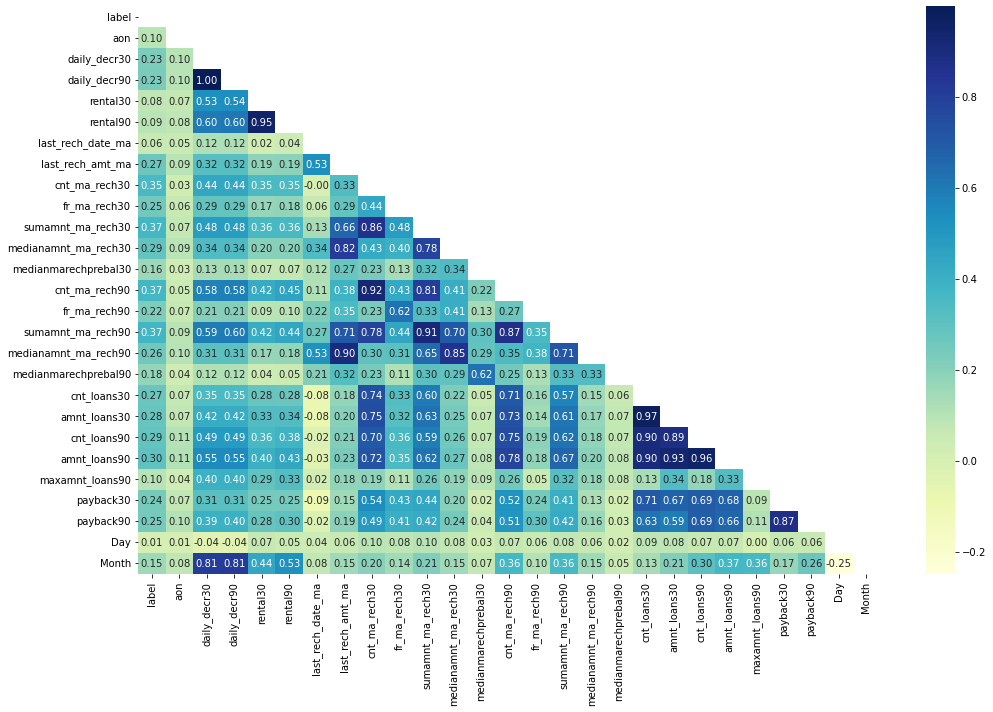

In [77]:
plt.figure(figsize=(15, 10))
mask = np.triu(df_x.corr())
sns.heatmap(df_x.corr(),cmap="YlGnBu",annot = True, fmt = '.2f',mask = mask)
plt.tight_layout()


- few features show high correlation with other features
- need to check for multicolinearity

#### using vif to check for multicolinearity

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=df_x.copy()
t=k.drop(['label'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
2,299.878479,daily_decr90
1,284.890798,daily_decr30
18,102.522276,amnt_loans30
17,91.313321,cnt_loans30
9,87.690372,sumamnt_ma_rech30
14,81.744929,sumamnt_ma_rech90
12,63.306183,cnt_ma_rech90
7,56.831638,cnt_ma_rech30
20,35.548826,amnt_loans90
19,19.504312,cnt_loans90


vif is not within limits

#### dropping daily_decr90

In [79]:
k=df_x.copy()
t=k.drop(['label','daily_decr90'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
17,102.453005,amnt_loans30
16,91.312323,cnt_loans30
8,87.562957,sumamnt_ma_rech30
13,81.428635,sumamnt_ma_rech90
11,63.256806,cnt_ma_rech90
6,56.786406,cnt_ma_rech30
19,35.428282,amnt_loans90
18,19.503888,cnt_loans90
14,18.582374,medianamnt_ma_rech90
9,18.104622,medianamnt_ma_rech30


#### dropping amnt_loans30

In [80]:
k=df_x.copy()
t=k.drop(['label','daily_decr90','amnt_loans30'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
8,87.533809,sumamnt_ma_rech30
13,81.425899,sumamnt_ma_rech90
11,63.040600,cnt_ma_rech90
6,56.542110,cnt_ma_rech30
18,29.839094,amnt_loans90
14,18.560774,medianamnt_ma_rech90
9,18.028905,medianamnt_ma_rech30
17,17.510358,cnt_loans90
3,13.464217,rental90
16,11.981841,cnt_loans30


#### dropping sumamnt_ma_rech30

In [81]:
k=df_x.copy()
t=k.drop(['label','daily_decr90','amnt_loans30','sumamnt_ma_rech30'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
10,30.164124,cnt_ma_rech90
17,29.838408,amnt_loans90
12,26.716757,sumamnt_ma_rech90
16,17.510117,cnt_loans90
3,13.438220,rental90
6,13.192429,cnt_ma_rech30
15,11.974967,cnt_loans30
13,11.912370,medianamnt_ma_rech90
2,11.770430,rental30
5,6.562749,last_rech_amt_ma


#### dropping cnt_ma_rech90

In [82]:
k=df_x.copy()
t=k.drop(['label','daily_decr90','amnt_loans30','sumamnt_ma_rech30','cnt_ma_rech90'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
16,28.790013,amnt_loans90
15,17.505751,cnt_loans90
3,13.322218,rental90
11,12.945627,sumamnt_ma_rech90
2,11.646369,rental30
14,11.323586,cnt_loans30
12,10.106813,medianamnt_ma_rech90
5,6.521521,last_rech_amt_ma
6,6.345806,cnt_ma_rech30
18,5.798637,payback30


#### dropping amnt_loans90

In [83]:
k=df_x.copy()
t=k.drop(['label','daily_decr90','amnt_loans30','sumamnt_ma_rech30','cnt_ma_rech90','amnt_loans90'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
3,13.271726,rental90
11,12.150529,sumamnt_ma_rech90
2,11.611088,rental30
12,9.938296,medianamnt_ma_rech90
15,8.363501,cnt_loans90
14,8.276384,cnt_loans30
5,6.509413,last_rech_amt_ma
6,6.252474,cnt_ma_rech30
17,5.773331,payback30
18,5.222941,payback90


#### dropping rental90

In [84]:
k=df_x.copy()
t=k.drop(['label','daily_decr90','amnt_loans30','sumamnt_ma_rech30','cnt_ma_rech90','amnt_loans90','rental90'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
10,11.918924,sumamnt_ma_rech90
11,9.888919,medianamnt_ma_rech90
14,8.314591,cnt_loans90
13,8.225383,cnt_loans30
4,6.501896,last_rech_amt_ma
5,6.201941,cnt_ma_rech30
16,5.771529,payback30
17,5.217109,payback90
7,5.035255,medianamnt_ma_rech30
1,4.606724,daily_decr30


#### dropping sumamnt_ma_rech90

In [85]:
k=df_x.copy()
t=k.drop(['label','daily_decr90','amnt_loans30','sumamnt_ma_rech30','cnt_ma_rech90','amnt_loans90','rental90','sumamnt_ma_rech90'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
12,8.081936,cnt_loans30
10,7.691714,medianamnt_ma_rech90
13,7.539478,cnt_loans90
4,6.226076,last_rech_amt_ma
15,5.727383,payback30
16,5.203687,payback90
7,4.954340,medianamnt_ma_rech30
1,4.475724,daily_decr30
18,3.821550,Month
5,3.156609,cnt_ma_rech30


vif is within limits less than 10 

#### dropping the columns from dataframe

In [86]:
df.drop(columns=['daily_decr90','amnt_loans30','sumamnt_ma_rech30','cnt_ma_rech90','amnt_loans90','rental90','sumamnt_ma_rech90'],inplace=True,axis=1)
df.shape

(209562, 21)

#### Splitting dataset

In [87]:
X=df_x.drop('label',axis=1)
Y=df_x['label']

#### checking if target data is imbalanced

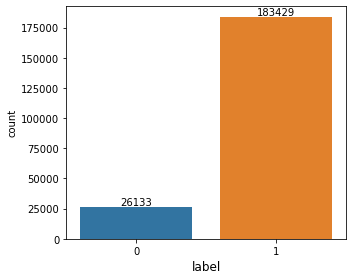

In [88]:
# plotting countplot graph 
plt.figure(figsize=(5,4))
ax =sns.countplot(df['label'])
ax.bar_label(ax.containers[0]);
plt.xlabel('label',fontsize=12)
plt.tight_layout()

imbalanced 

#### Using Smote to balance the data

In [89]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(0.75)
X, Y = oversample.fit_resample(X, Y)

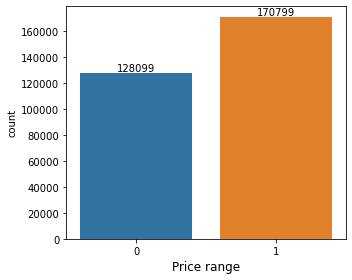

In [90]:
# plotting countplot graph 
plt.figure(figsize=(5,4))
ax =sns.countplot(Y)
ax.bar_label(ax.containers[0]);
plt.xlabel('Price range',fontsize=12)
plt.tight_layout()

#### Running algorithm

In [91]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
A=[]
B=[]
C=[]
D=[]
E=[]
mae=[]

In [92]:
#loop used to find the best random state
def max_aucroc_score(regr,X,Y):
    max_aucroc_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = r_state, test_size=0.20,stratify=Y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        aucroc_scr=(accuracy_score(y_test,y_pred))*100
        print("accuracy score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [93]:
# used to get test accuracy, train accuracy, mse, mae,F1score,confusion matrix,classification report and auc score
def te_t(regr,x_train,x_test,y_train,y_test):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(accuracy_score(y_test,y_te)*100,1)}")
    A.append(round(accuracy_score(y_test,y_te)*100,1))
   
    print(f"train accuracy is {round(accuracy_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    
    
    cm = confusion_matrix(y_test, y_te)
    class_label = ["Yes", "No"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print('\n')
    
    print("f1 score is : ",f1_score(y_test,y_te))
    E.append(f1_score(y_test,y_te))
    print('\n')
    
    print("classification report \n",classification_report(y_test,y_te))
   

In [94]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(accuracy_score(y_train,y_tr)*100,1)
    te_ac=round(accuracy_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [95]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
R=max_aucroc_score(reg,X,Y)

accuracy score corresponding to  0  is  90.01170960187353
accuracy score corresponding to  1  is  90.17731682837069
accuracy score corresponding to  2  is  89.81933757109401
accuracy score corresponding to  3  is  90.02341920374707
accuracy score corresponding to  4  is  90.19404483104717
accuracy score corresponding to  5  is  90.0
accuracy score corresponding to  6  is  89.95316159250586
accuracy score corresponding to  7  is  89.81599197055871
accuracy score corresponding to  8  is  90.26932084309134
accuracy score corresponding to  9  is  90.18735362997658
accuracy score corresponding to  10  is  90.15389762462362
accuracy score corresponding to  11  is  90.09200401472064
accuracy score corresponding to  12  is  90.0869856139177
accuracy score corresponding to  13  is  89.95148879223821
accuracy score corresponding to  14  is  90.11876881900301
accuracy score corresponding to  15  is  89.94145199063232
accuracy score corresponding to  16  is  90.15557042489127
accuracy score corres

test accuracy is 90.0
train accuracy is 100.0


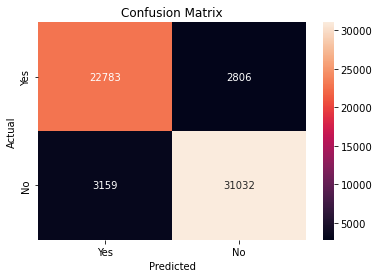



f1 score is :  0.9123168060680005


classification report 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     25589
           1       0.92      0.91      0.91     34191

    accuracy                           0.90     59780
   macro avg       0.90      0.90      0.90     59780
weighted avg       0.90      0.90      0.90     59780



At cv is 2 cv score is 88.64  
 test accuracy is 90.0 

At cv is 3 cv score is 89.34  
 test accuracy is 90.0 

At cv is 4 cv score is 89.39  
 test accuracy is 90.0 

At cv is 5 cv score is 89.47  
 test accuracy is 90.0 

At cv is 6 cv score is 89.86  
 test accuracy is 90.0 

At cv is 7 cv score is 90.0  
 test accuracy is 90.0 

At cv is 8 cv score is 90.15  
 test accuracy is 90.0 

At cv is 9 cv score is 90.16  
 test accuracy is 90.0 

At cv is 10 cv score is 90.21  
 test accuracy is 90.0 

At cv is 11 cv score is 90.2  
 test accuracy is 90.0 

At cv is 12 cv score is 90.21  
 test accuracy is

In [96]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test)

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()
R=max_aucroc_score(rf_c,X,Y)

accuracy score corresponding to  0  is  94.32418869187019
accuracy score corresponding to  1  is  94.27400468384076
accuracy score corresponding to  2  is  94.10003345600535
accuracy score corresponding to  3  is  94.29575108732018
accuracy score corresponding to  4  is  94.34593509534962
accuracy score corresponding to  5  is  94.22883907661426
accuracy score corresponding to  6  is  94.20207427233188
accuracy score corresponding to  7  is  94.32753429240549
accuracy score corresponding to  8  is  94.46972231515556
accuracy score corresponding to  9  is  94.25727668116427
accuracy score corresponding to  10  is  94.39110070257611
accuracy score corresponding to  11  is  94.39277350284377
accuracy score corresponding to  12  is  94.28905988624959
accuracy score corresponding to  13  is  94.4463031114085
accuracy score corresponding to  14  is  94.3626630980261
accuracy score corresponding to  15  is  94.26396788223485
accuracy score corresponding to  16  is  94.32251589160255
accuracy 

test accuracy is 94.2
train accuracy is 100.0


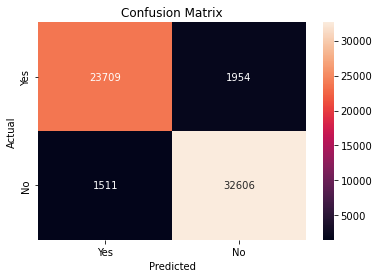



f1 score is :  0.9495464274793599


classification report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     25663
           1       0.94      0.96      0.95     34117

    accuracy                           0.94     59780
   macro avg       0.94      0.94      0.94     59780
weighted avg       0.94      0.94      0.94     59780



At cv is 2 cv score is 92.95  
 test accuracy is 94.2 

At cv is 3 cv score is 93.38  
 test accuracy is 94.2 

At cv is 4 cv score is 93.53  
 test accuracy is 94.2 

At cv is 5 cv score is 93.64  
 test accuracy is 94.2 

At cv is 6 cv score is 93.89  
 test accuracy is 94.2 

At cv is 7 cv score is 94.13  
 test accuracy is 94.2 

At cv is 8 cv score is 94.17  
 test accuracy is 94.2 

At cv is 9 cv score is 94.25  
 test accuracy is 94.2 

At cv is 10 cv score is 94.23  
 test accuracy is 94.2 

At cv is 11 cv score is 94.29  
 test accuracy is 94.2 

At cv is 12 cv score is 94.33  
 test accuracy 

In [98]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_c,x2_train,x2_test,y2_train,y2_test)
print('\n')
score(rf_c,x2_train,x2_test,y2_train,y2_test)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
R=max_aucroc_score(kc,X,Y)

accuracy score corresponding to  0  is  87.81866845098695
accuracy score corresponding to  1  is  87.92572766811642
accuracy score corresponding to  2  is  87.71662763466043
accuracy score corresponding to  3  is  87.96252927400468
accuracy score corresponding to  4  is  87.93576446972232
accuracy score corresponding to  5  is  87.80528604884577
accuracy score corresponding to  6  is  88.06958849113416
accuracy score corresponding to  7  is  87.80194044831046
accuracy score corresponding to  8  is  88.07627969220475
accuracy score corresponding to  9  is  88.1549013047842
accuracy score corresponding to  10  is  87.87554366008699
accuracy score corresponding to  11  is  88.04784208765474
accuracy score corresponding to  12  is  87.78855804616929
accuracy score corresponding to  13  is  88.00602208096353
accuracy score corresponding to  14  is  87.84543325526933
accuracy score corresponding to  15  is  87.76012044161928
accuracy score corresponding to  16  is  87.83539645366344
accuracy

test accuracy is 88.0
train accuracy is 91.5


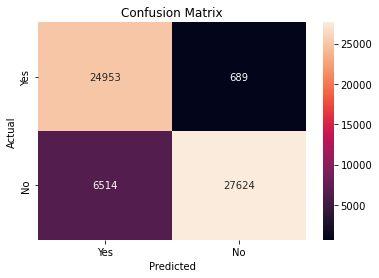



f1 score is :  0.8846615746745449


classification report 
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     25642
           1       0.98      0.81      0.88     34138

    accuracy                           0.88     59780
   macro avg       0.88      0.89      0.88     59780
weighted avg       0.90      0.88      0.88     59780



At cv is 2 cv score is 86.4  
 test accuracy is 88.0 

At cv is 3 cv score is 87.48  
 test accuracy is 88.0 

At cv is 4 cv score is 87.93  
 test accuracy is 88.0 

At cv is 5 cv score is 88.17  
 test accuracy is 88.0 

At cv is 6 cv score is 88.26  
 test accuracy is 88.0 

At cv is 7 cv score is 88.32  
 test accuracy is 88.0 

At cv is 8 cv score is 88.38  
 test accuracy is 88.0 

At cv is 9 cv score is 88.44  
 test accuracy is 88.0 

At cv is 10 cv score is 88.5  
 test accuracy is 88.0 

At cv is 11 cv score is 88.51  
 test accuracy is 88.0 

At cv is 12 cv score is 88.53  
 test accuracy is

In [100]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(kc,x3_train,x3_test,y3_train,y3_test)
print('\n')
score(kc,x3_train,x3_test,y3_train,y3_test)

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
grad_c=GradientBoostingClassifier()
R=max_aucroc_score(grad_c,X,Y)


accuracy score corresponding to  0  is  89.50652392104382
accuracy score corresponding to  1  is  89.45132151221145
accuracy score corresponding to  2  is  89.1368350618936
accuracy score corresponding to  3  is  89.08832385413181
accuracy score corresponding to  4  is  89.60354633656742
accuracy score corresponding to  5  is  89.21211107393778
accuracy score corresponding to  6  is  89.55001672800267
accuracy score corresponding to  7  is  89.35931749749079
accuracy score corresponding to  8  is  89.8327199732352
accuracy score corresponding to  9  is  89.6202743392439
accuracy score corresponding to  10  is  89.53496152559384
accuracy score corresponding to  11  is  89.55336232853797
accuracy score corresponding to  12  is  89.46637671462028
accuracy score corresponding to  13  is  89.64034794245566
accuracy score corresponding to  14  is  89.51823352291737
accuracy score corresponding to  15  is  89.51321512211442
accuracy score corresponding to  16  is  89.41953830712613
accuracy s

test accuracy is 89.7
train accuracy is 89.7


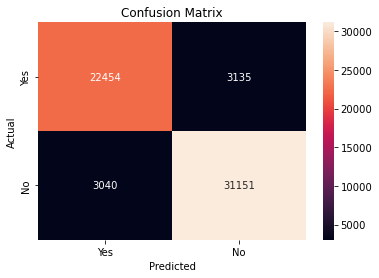



f1 score is :  0.9098237364370517


classification report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     25589
           1       0.91      0.91      0.91     34191

    accuracy                           0.90     59780
   macro avg       0.89      0.89      0.89     59780
weighted avg       0.90      0.90      0.90     59780



At cv is 2 cv score is 89.1  
 test accuracy is 89.7 

At cv is 3 cv score is 89.02  
 test accuracy is 89.7 

At cv is 4 cv score is 88.97  
 test accuracy is 89.7 

At cv is 5 cv score is 89.07  
 test accuracy is 89.7 

At cv is 6 cv score is 89.26  
 test accuracy is 89.7 

At cv is 7 cv score is 89.26  
 test accuracy is 89.7 

At cv is 8 cv score is 89.21  
 test accuracy is 89.7 

At cv is 9 cv score is 89.24  
 test accuracy is 89.7 

At cv is 10 cv score is 89.3  
 test accuracy is 89.7 

At cv is 11 cv score is 89.39  
 test accuracy is 89.7 

At cv is 12 cv score is 89.31  
 test accuracy is

In [102]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_c,x4_train,x4_test,y4_train,y4_test)
print('\n')
score(grad_c,x4_train,x4_test,y4_train,y4_test)

In [103]:
from sklearn.ensemble import AdaBoostClassifier
adboost_c=AdaBoostClassifier()
R=max_aucroc_score(adboost_c,X,Y)

accuracy score corresponding to  0  is  84.6169287387086
accuracy score corresponding to  1  is  85.24088323854131
accuracy score corresponding to  2  is  84.4362663098026
accuracy score corresponding to  3  is  84.44797591167614
accuracy score corresponding to  4  is  84.38608230177317
accuracy score corresponding to  5  is  84.99498159919706
accuracy score corresponding to  6  is  84.53161592505855
accuracy score corresponding to  7  is  84.71896955503513
accuracy score corresponding to  8  is  85.14553362328537
accuracy score corresponding to  9  is  84.80595516895283
accuracy score corresponding to  10  is  84.7039143526263
accuracy score corresponding to  11  is  84.91970558715289
accuracy score corresponding to  12  is  85.25593844095015
accuracy score corresponding to  13  is  85.1221144195383
accuracy score corresponding to  14  is  84.60354633656742
accuracy score corresponding to  15  is  84.5265975242556
accuracy score corresponding to  16  is  84.70224155235864
accuracy sco

test accuracy is 84.5
train accuracy is 84.7


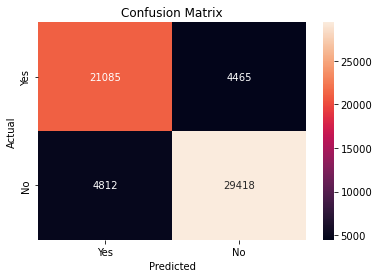



f1 score is :  0.8637998619940394


classification report 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82     25550
           1       0.87      0.86      0.86     34230

    accuracy                           0.84     59780
   macro avg       0.84      0.84      0.84     59780
weighted avg       0.85      0.84      0.84     59780



At cv is 2 cv score is 84.54  
 test accuracy is 84.5 

At cv is 3 cv score is 84.76  
 test accuracy is 84.5 

At cv is 4 cv score is 84.68  
 test accuracy is 84.5 

At cv is 5 cv score is 84.57  
 test accuracy is 84.5 

At cv is 6 cv score is 84.72  
 test accuracy is 84.5 

At cv is 7 cv score is 84.74  
 test accuracy is 84.5 

At cv is 8 cv score is 84.84  
 test accuracy is 84.5 

At cv is 9 cv score is 84.69  
 test accuracy is 84.5 

At cv is 10 cv score is 84.83  
 test accuracy is 84.5 

At cv is 11 cv score is 84.86  
 test accuracy is 84.5 

At cv is 12 cv score is 84.83  
 test accuracy 

In [104]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_c,x5_train,x5_test,y5_train,y5_test)
print('\n')
score(adboost_c,x5_train,x5_test,y5_train,y5_test)

In [105]:
from sklearn.metrics import roc_curve,auc
area=[]

In [106]:
y_te=reg.predict(x1_test)
fpr1,tpr1,threshold1=roc_curve(y_te,y1_test)
roc_auc1= auc(fpr1, tpr1)
area.append(roc_auc1)
print("Area under the Decision Tree ROC curve : %f" % roc_auc1)

Area under the Decision Tree ROC curve : 0.897652


In [107]:
y_te=rf_c.predict(x2_test)
fpr2,tpr2,threshold2=roc_curve(y_te,y2_test)
roc_auc2= auc(fpr2, tpr2)
area.append(roc_auc2)
print("Area under the Random Forest ROC curve : %f" % roc_auc2)

Area under the Random Forest ROC curve : 0.941774


In [108]:
y_te=kc.predict(x3_test)
fpr3,tpr3,threshold3=roc_curve(y_te,y3_test)
roc_auc3= auc(fpr3, tpr3)
area.append(roc_auc3)
print("Area under the KNN ROC curve : %f" % roc_auc3)

Area under the KNN ROC curve : 0.884327


In [109]:
y_te=grad_c.predict(x4_test)
fpr4,tpr4,threshold4=roc_curve(y_te,y4_test)
roc_auc4= auc(fpr4, tpr4)
area.append(roc_auc4)
print("Area under the Grad boost ROC curve : %f" % roc_auc4)

Area under the Grad boost ROC curve : 0.894660


In [110]:

y_te=adboost_c.predict(x5_test)
fpr5,tpr5,threshold5=roc_curve(y_te,y5_test)
roc_auc5= auc(fpr5, tpr5)
area.append(roc_auc5)
print("Area under the adaboost ROC curve : %f" % roc_auc5)

Area under the adaboost ROC curve : 0.841205


#### Creating Table to store datas

In [111]:
aa=['DT','RF','KNN','GRAD','adaboost']
kk=pd.DataFrame({'test accuracy':A,'max_cv_score': B,'diff':D,'mse':C,'mae':mae,'F1 score':E,'roc_curve_area':area},index=aa)
kk.sort_values(by=['diff','test accuracy', 'mse', 'mae' ])

,test accuracy,max_cv_score,diff,mse,mae,F1 score,roc_curve_area
DT,90.0,90.386366,0.000951,0.099783,0.099783,0.912317,0.897652
RF,94.2,94.471767,0.032831,0.057963,0.057963,0.949546,0.941774
adaboost,84.5,84.915290,0.044895,0.155186,0.155186,0.863800,0.841205
KNN,88.0,88.631245,0.074017,0.120492,0.120492,0.884662,0.884327
GRAD,89.7,89.425214,0.274786,0.103295,0.103295,0.909824,0.894660


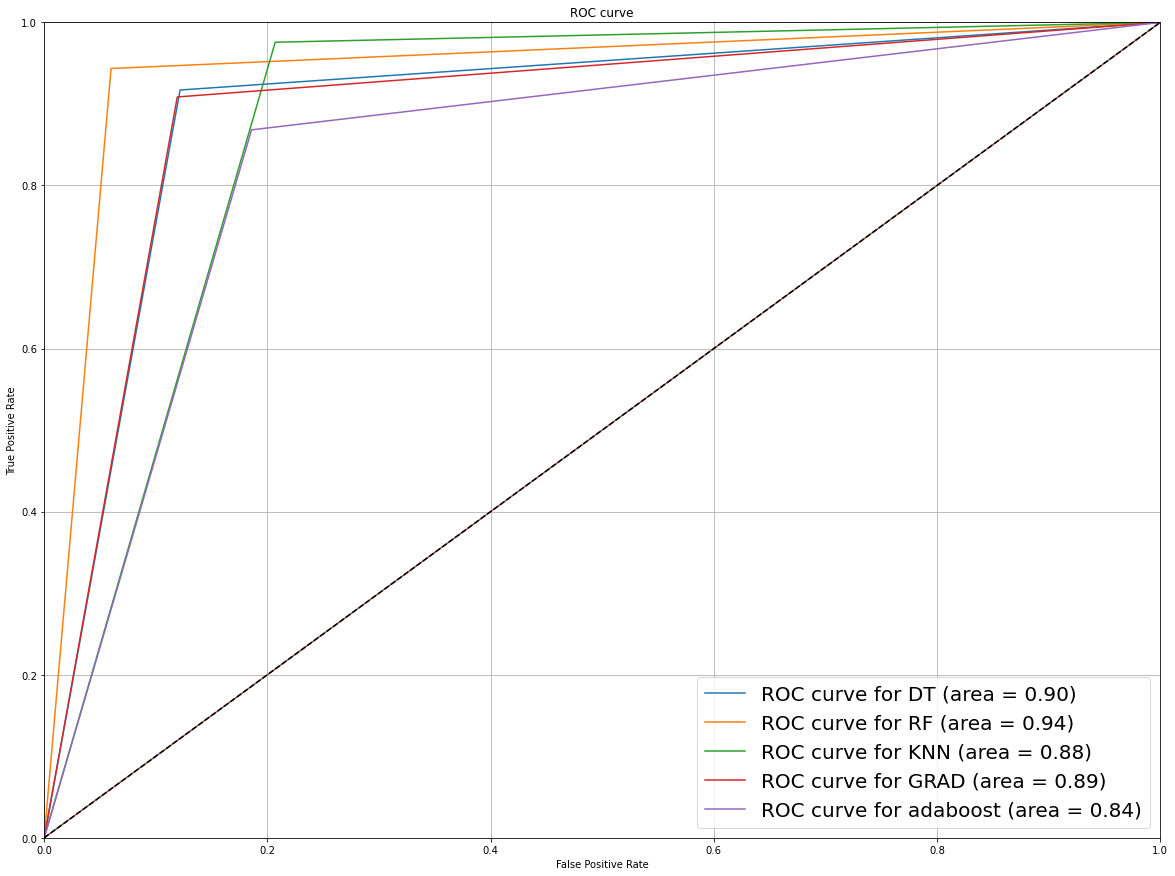

In [112]:
plt.figure(figsize = (20,15))

plt.plot(fpr1, tpr1, label = 'ROC curve for DT (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'ROC curve for RF (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'ROC curve for KNN (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label = 'ROC curve for GRAD (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label = 'ROC curve for adaboost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], [0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)
plt.show()

#### Inference
- Random Forest is the best model
    - highest roc_curve area
    - highest test accuracy and cv_score
    - 2nd highest in difference between cv_score and test accuracy
    - least error compared to other model
    - highest F1score, precision and recall
    - importance is to reduced FN, which implies that in actual case itss default but prediction is not defaulter, the least value of FN is for KNN, followed by RF
    
- all these indicates by RF is the best model    
    

In [113]:
import pickle
filename='Micro Credit Loan Defaulter.pkl'
pickle.dump(rf_c,open(filename,'wb'))

In [114]:
l_m=pickle.load(open('Micro Credit Loan Defaulter.pkl','rb'))
re=l_m.score(x2_test,y2_test)
print(re*100)

94.20374707259953
